# Análisis de Datos Netflix

In [63]:
import pandas as pd
import numpy as np

## Cargo los datos

In [2]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Limpieza de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

Elimino las columnas que son nulas

In [4]:
df = df.dropna(axis=1, how='all')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Relleno los valores nulos de las columnas director, cast, country con "Sin datos".

In [6]:
df['director'].fillna('Sin datos', inplace=True)
df['cast'].fillna('Sin datos', inplace=True)
df['country'].fillna('Sin datos', inplace=True)

df.isna().sum()

C:\Users\hda54\AppData\Local\Temp\ipykernel_19176\3766124764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Sin datos', inplace=True)
C:\Users\hda54\AppData\Local\Temp\ipykernel_19176\3766124764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

Borro la columna rating.

In [7]:
df = df.drop(columns='rating')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      8809 non-null   object
 4   cast          8809 non-null   object
 5   country       8809 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   duration      8806 non-null   object
 9   listed_in     8809 non-null   object
 10  description   8809 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.2+ KB


# Visualización

¿De que hay más en netflix? (movies o TV show?)

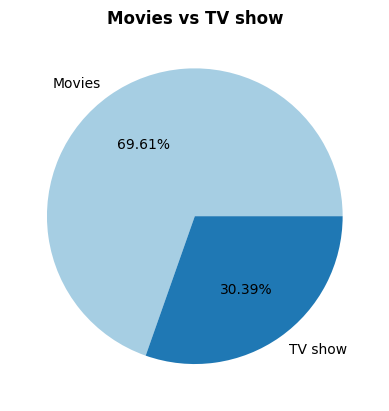

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df_series = df[['type']]
#usa = df_series.loc[(df_series['country'] == 'United States')]
usa = df_series.value_counts()
label = 'Movies', 'TV show'
color = sns.color_palette('Paired')

plt.pie(usa, colors=color, labels=label, autopct='%1.2f%%')
plt.title('Movies vs TV show', fontweight='bold')
plt.show()


¿Que países producen mas peliculas en netflix? <br>
¿Que países producen mas TV shows en netflix?<br>
¿Que países producen mas peliculas y TV shows en netflix?<br>

<Axes: title={'center': 'Top 10 paises que más producen en Netflix'}, xlabel='Cantidad', ylabel='Paises'>

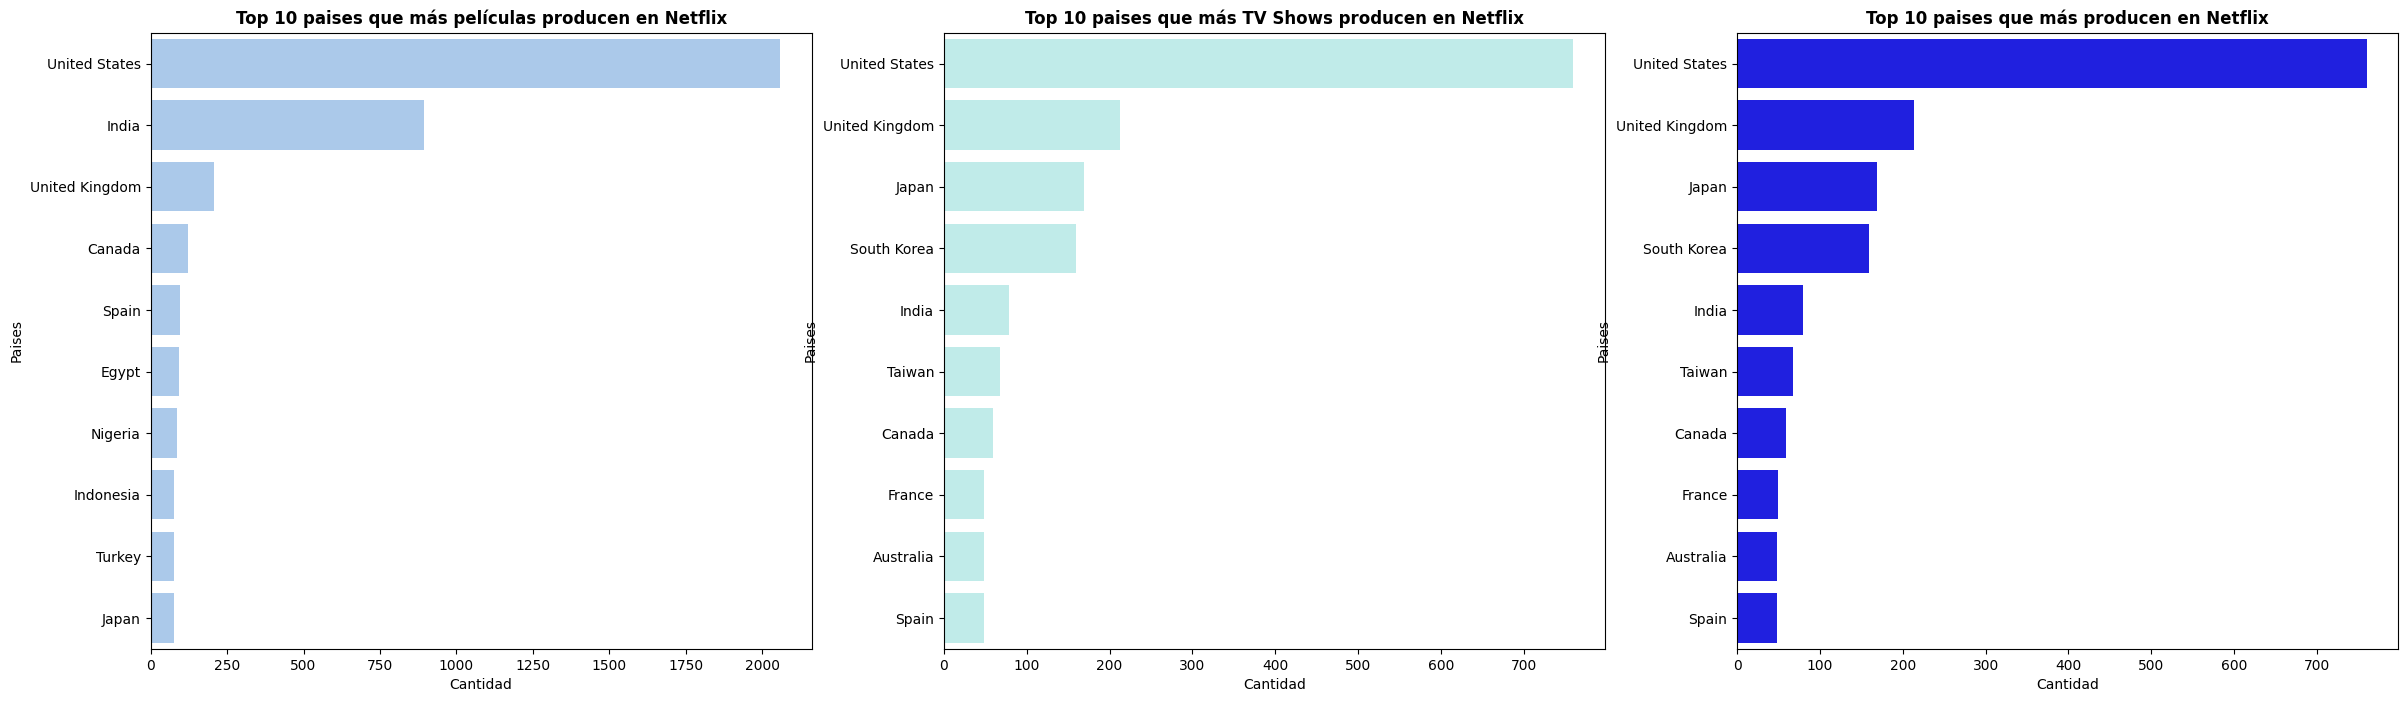

In [50]:
# Movies
datos_movies = df[(df['type'] == 'Movie') & (df['country'] != 'Sin datos')]
top_country_movies = datos_movies.country.value_counts().nlargest(10).sort_values(ascending=False).to_frame()
top_country_movies

# TV shows
datos_shows = df[(df['type'] == 'TV Show') & (df['country'] != 'Sin datos')]
top_country_shows = datos_shows['country'].value_counts().nlargest(10).sort_values(ascending=False).to_frame()
#top_country_shows

# Combinado
datos_combinados = df[(df['country'] != 'Sin datos')]
top_country = datos_combinados['country'].value_counts().nlargest(10).sort_values(ascending=False).to_frame()
#top_country

fig, ax = plt.subplots(1,3, figsize=(29,8))
sns.set_color_codes("pastel")

# Grafico 1 Movies
ax[0].set_title('Top 10 paises que más películas producen en Netflix', fontweight='bold')
ax[0].set_xlabel('Cantidad')
ax[0].set_ylabel('Paises')
sns.barplot(data=top_country_movies, x='count', y='country', ax=ax[0], color='b')

# Grafico 2 TV Shows
ax[1].set_title('Top 10 paises que más TV Shows producen en Netflix', fontweight='bold')
ax[1].set_xlabel('Cantidad')
ax[1].set_ylabel('Paises')
sns.barplot(data=top_country_shows, x='count', y='country', ax=ax[1], color='c')

# Grafico 3 combinadas
ax[2].set_title('Top 10 paises que más producen en Netflix', fontweight='bold')
ax[2].set_xlabel('Cantidad')
ax[2].set_ylabel('Paises')
sns.barplot(data=top_country_shows, x='count', y='country', ax=ax[2], color='blue')


¿Cual es la duración media de las películas?

In [67]:
media_movies = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)
medias = np.mean(media_movies).round(2)

print(f'La duración media de las películas en Netflix es de {medias} minutos')

La duración media de las películas en Netflix es de 99.58 minutos


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hda54\AppData\Local\Temp\ipykernel_19176\2089646411.py:1: SyntaxWarning: invalid escape sequence '\d'
  media_movies = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)


¿Cual es la distriución de la duración de las peliculas?

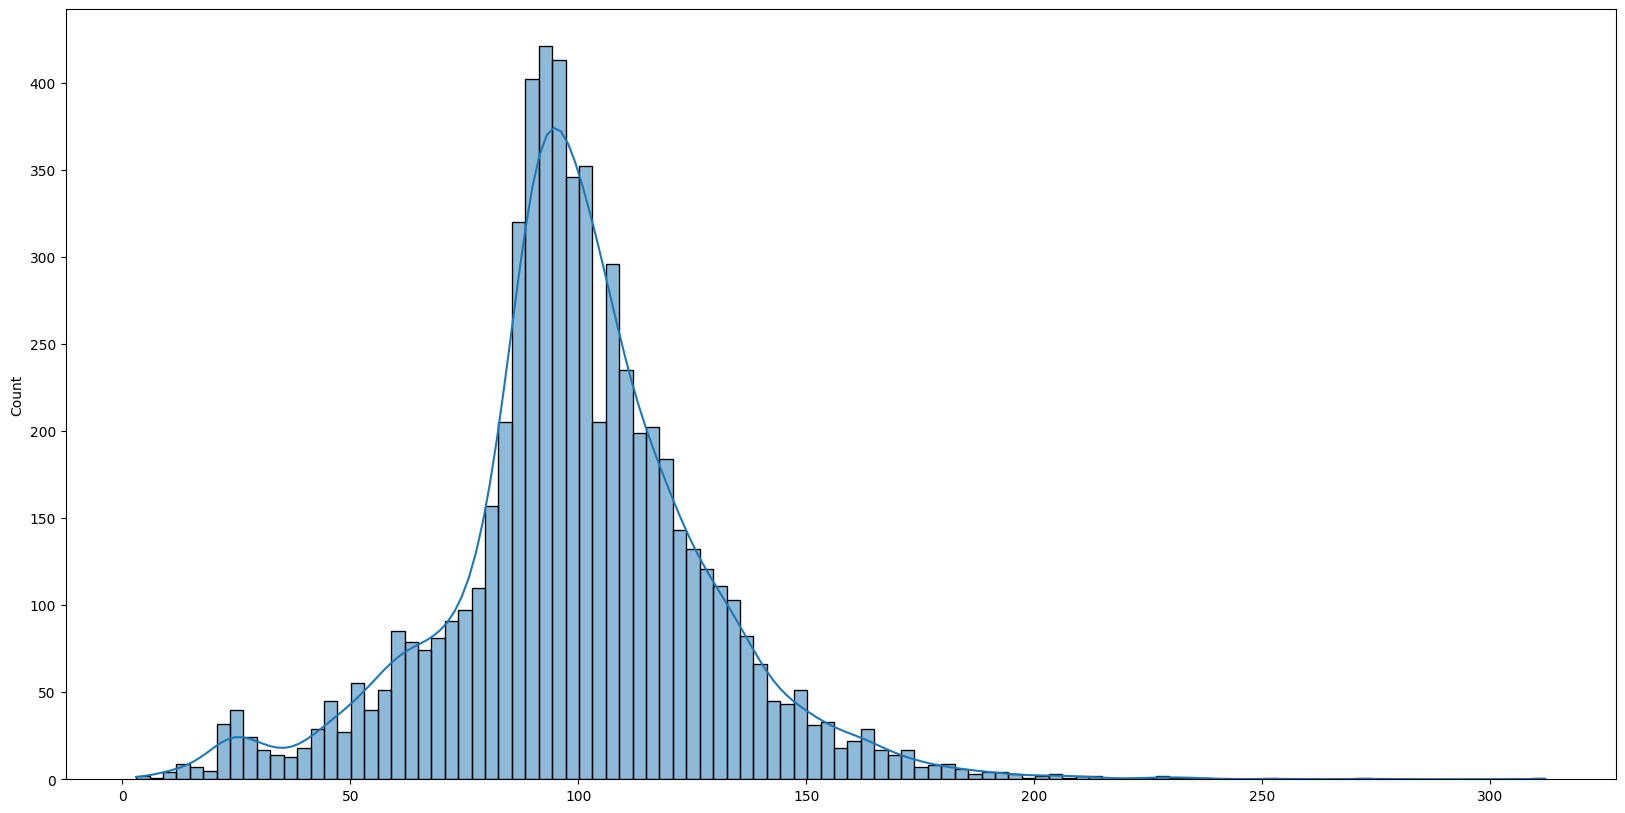

In [70]:
plt.figure(figsize=(20,10))

sns.histplot(data=media_movies, kde=True, legend=False)

plt.show()

¿Cual es la probabilidad de que la proxima pelicula de netflix supere los 100 minutos?

In [71]:
from scipy.stats import norm

In [75]:
# Saco las desviacion standard
std_dev = np.std(media_movies).round(2)

prob = ((1 - norm.cdf(100, medias, std_dev)) * 100).round(2)
print(f'La probabilidad de que la próxima película que suban a Netflix supere los 100 min es del {prob}%')

La probabilidad de que la próxima película que suban a Netflix supere los 100 min es del [49.41]%


C:\Users\hda54\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


¿Cuales son los 5 directores más recurrente en netflix? Tanto en peliculas como en TV Shows

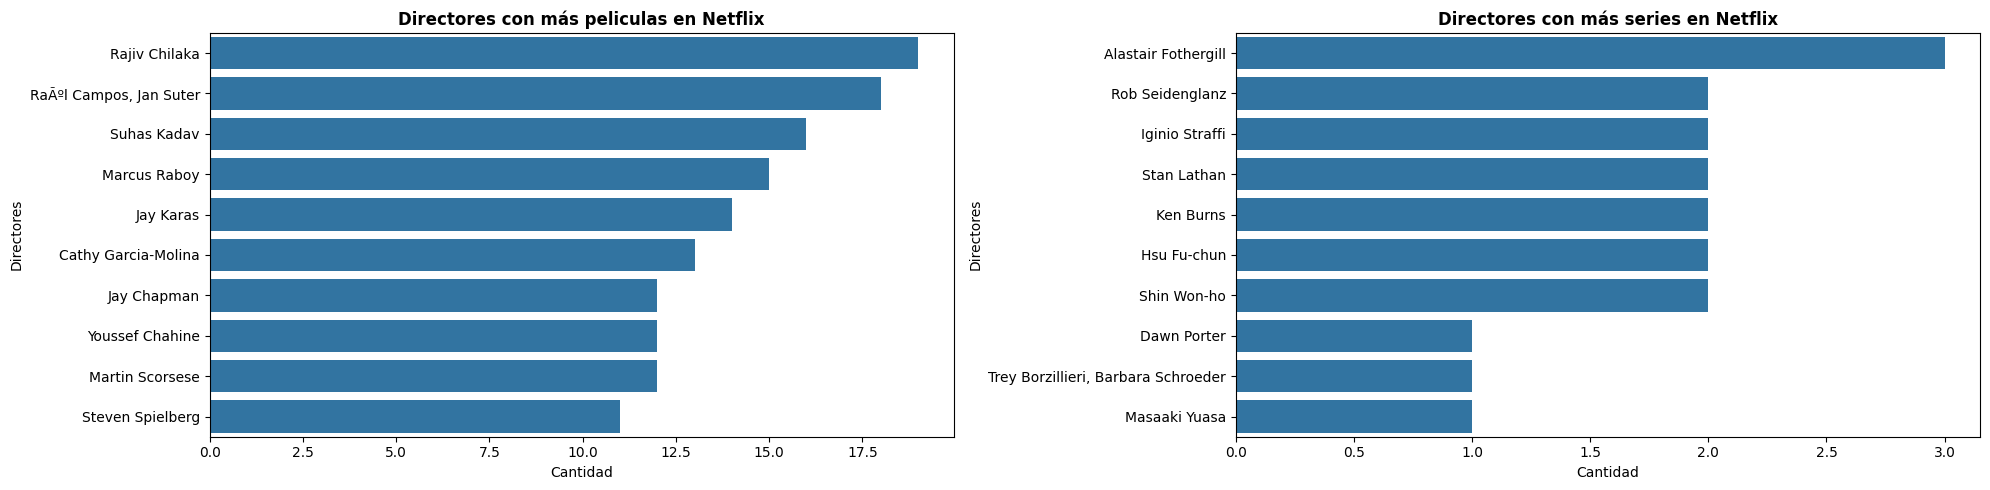

In [95]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

# Movies
df_directores_movies = df[(df['director'] != 'Sin datos') & (df['type'] == 'Movie')]['director'].value_counts().nlargest(10).to_frame()

# TV Shows
df_directores_shows = df[(df['director'] != 'Sin datos') & (df['type'] == 'TV Show')]['director'].value_counts().nlargest(10).to_frame()

# Grafico Movies
sns.barplot(data=df_directores_movies, x='count', y='director', ax=ax[0])
ax[0].set_title('Directores con más peliculas en Netflix', fontweight='bold')
ax[0].set_xlabel('Cantidad')
ax[0].set_ylabel('Directores')

# Grafico Movies
sns.barplot(data=df_directores_shows, x='count', y='director', ax=ax[1])
ax[1].set_title('Directores con más series en Netflix', fontweight='bold')
ax[1].set_xlabel('Cantidad')
ax[1].set_ylabel('Directores')

plt.tight_layout()
plt.show()



¿En que años se publicaron más peliculas y series?

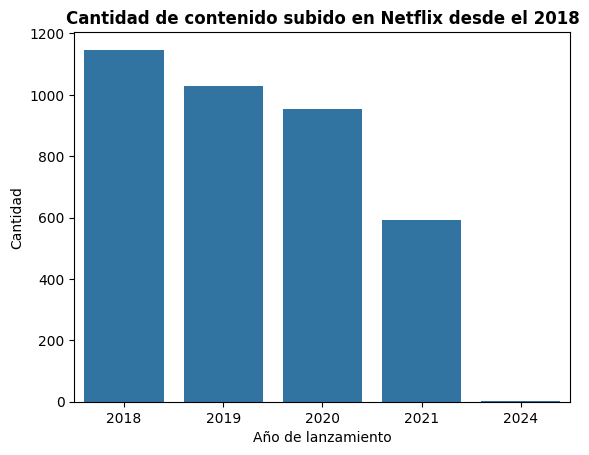

In [108]:
anios = df[df['release_year'] >= 2018]['release_year'].value_counts().to_frame().sort_index()

fig, ax = plt.subplots()
sns.barplot(data=anios, x='release_year', y='count', ax=ax)
ax.set_title('Cantidad de contenido subido en Netflix desde el 2018', fontweight='bold')
ax.set_xlabel('Año de lanzamiento')
ax.set_ylabel('Cantidad')



plt.show()